In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
data = sns.load_dataset("titanic")

In [83]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [84]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
## Data Understanding

In [86]:
data.isnull().sum()  #to find the null values together calcualted as sum

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

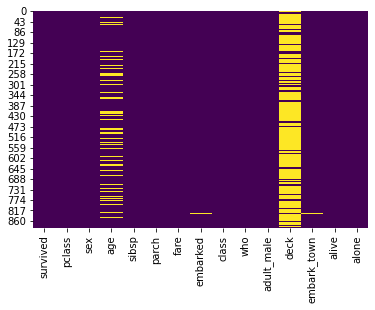

In [87]:
sns.heatmap(data.isnull(),cbar=False,cmap="viridis")

In [88]:
data['age'].isnull().sum()/data.shape[0]*100

19.865319865319865

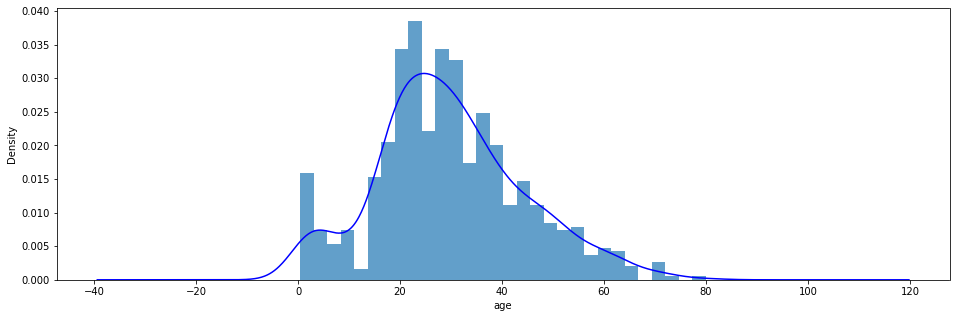

In [89]:
ax = data['age'].hist(bins =30,density =True,stacked =True,alpha=0.7,figsize=(16,5))
data['age'].plot(kind='density',color='blue')
ax.set_xlabel('age')
plt.show()

c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\karthika\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to us

Text(0.5, 1.0, 'Male')

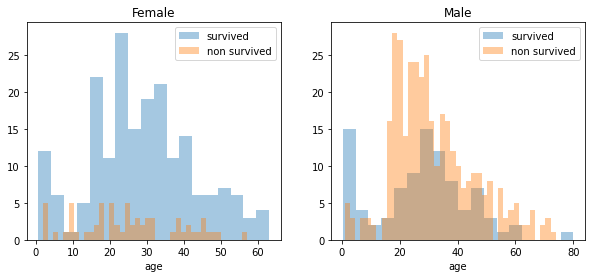

In [90]:
survived ='survived'
non_survived = 'non survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
women=data[data['sex']=='female']
men=data[data['sex']=='male']


ax= sns.distplot(women[women[survived]==1].age.dropna(), bins = 18,label = survived, ax=axes[0],kde=False)
ax= sns.distplot(women[women[survived]==0].age.dropna(), bins = 40,label = non_survived, ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')

ax= sns.distplot(men[men[survived]==1].age.dropna(), bins = 18,label = survived, ax=axes[1],kde=False)
ax= sns.distplot(men[men[survived]==0].age.dropna(), bins = 40,label = non_survived, ax=axes[1],kde=False)
ax.legend()
ax.set_title('Male')



In [91]:
data['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

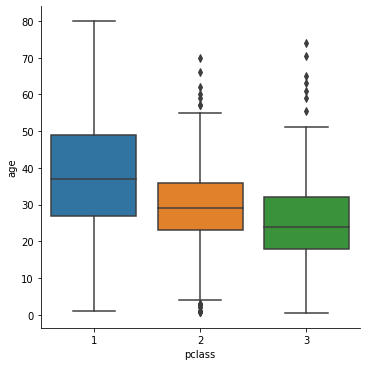

In [92]:
sns.catplot(x='pclass', y='age', data= data,kind='box')

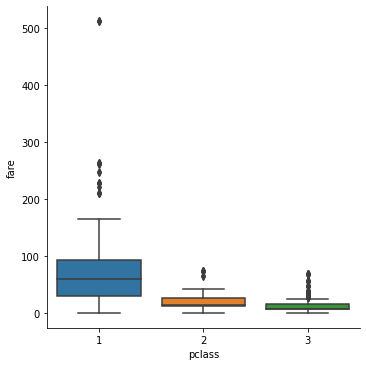

In [93]:
sns.catplot(x='pclass',y='fare', data=data,kind="box")

In [94]:
data[data['pclass']==1]['age'].mean()

38.233440860215055

In [95]:
data[data['pclass']==2]['age'].mean()

29.87763005780347

In [96]:
data[data['pclass']==3]['age'].mean()

25.14061971830986

In [97]:
def inpute_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return data[data['pclass']== 1]['age'].mean()
        elif pclass == 2:
            return data[data['pclass']==2]['age'].mean()
        elif pclass ==3:
            return  data[data['pclass']==3]['age'].mean()
        
        
    else:
        return age
    

In [98]:
data['age'] == data[['age','pclass']].apply(inpute_age, axis=1)

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Length: 891, dtype: bool

<AxesSubplot:>

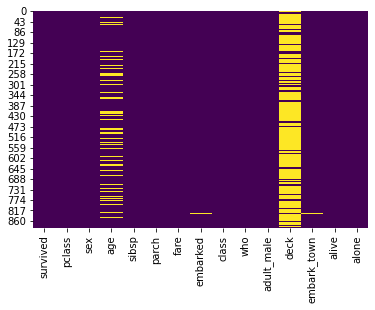

In [102]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")

In [103]:
#analysing Embarked

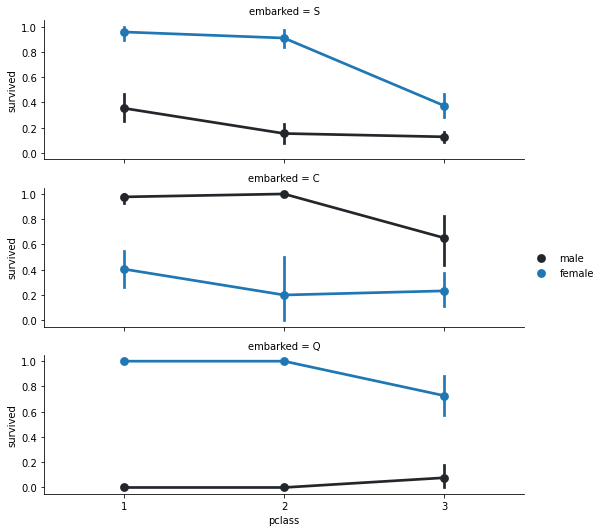

In [104]:
f = sns.FacetGrid(data,row = 'embarked',height=2.5, aspect=3)
f.map(sns.pointplot, 'pclass','survived','sex',order=None,hue_order= None)
f.add_legend()

In [105]:
data['embarked'].isnull().sum()

2

In [106]:
data['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [107]:
common_value = 'S'
data['embarked'].fillna(common_value,inplace=True)

In [108]:
data['embarked'].isnull().sum()  

0

<AxesSubplot:>

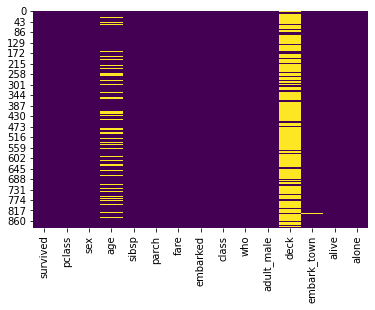

In [109]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [111]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [112]:
#Convert the categorical data into numerical data type

In [113]:
genders = {'male':0,'female':1}
data['sex'] = data['sex'].map(genders)

In [114]:
who = {'man':0,'women':1,'child':2}
data['who'] = data['who'].map(who)

In [115]:
alone = {True:1, False:0}
data['alone']=data['alone'].map(alone)


In [116]:
ports = {'S':0, 'C':1, 'Q':2}
data['embarked']:data['embarked'].map(ports)

In [117]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,Third,0.0,True,NaN,Southampton,no,0
1,1,1,1,38.0,1,0,71.2833,C,First,NaN,False,C,Cherbourg,yes,0
2,1,3,1,26.0,0,0,7.9250,S,Third,NaN,False,NaN,Southampton,yes,1
3,1,1,1,35.0,1,0,53.1000,S,First,NaN,False,C,Southampton,yes,0
4,0,3,0,35.0,0,0,8.0500,S,Third,0.0,True,NaN,Southampton,no,1


In [118]:
data.drop(labels =['class', 'who'],axis=1, inplace=True)

In [119]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,embark_town,alive,alone
0,0,3,0,22.0,1,0,7.2500,S,True,NaN,Southampton,no,0
1,1,1,1,38.0,1,0,71.2833,C,False,C,Cherbourg,yes,0
2,1,3,1,26.0,0,0,7.9250,S,False,NaN,Southampton,yes,1
3,1,1,1,35.0,1,0,53.1000,S,False,C,Southampton,yes,0
4,0,3,0,35.0,0,0,8.0500,S,True,NaN,Southampton,no,1


In [120]:
#Logistic Regression

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [131]:
x=data.drop('survived', axis=1)
y=data['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33,random_state = 42)

In [132]:
x_train.shape

(596, 12)